In [70]:
import numpy as np
import pandas as pd

In [71]:
df = pd.read_csv('data/imdb.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Pre-processing

In [73]:
# Standardize column names
df.columns = ['rank', 'title', 'genres', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue', 'metascore']

# lowercase genres
df.genres = df.genres.map(str.lower)

df.head()

,rank,title,genres,description,director,actors,year,runtime,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"action,adventure,sci-fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"adventure,mystery,sci-fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"horror,thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"animation,comedy,family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"action,adventure,fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## General statistics

In [74]:
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Ratings and Revenue

<AxesSubplot:xlabel='rating'>

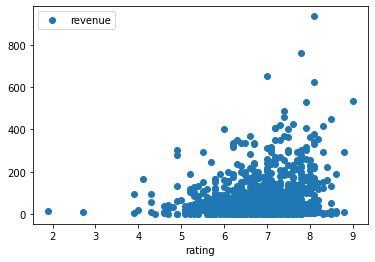

In [75]:
df.plot(x="rating", y="revenue", style="o")

## Average revenue of the 100 movies vs average revenue of the next 100 movies

In [76]:
print("Average revenue of the top 100 movies:", df.head(100).revenue.mean())
print("Average revenue of the top 100-200 movies:", df.head(200).tail(100).revenue.mean())

Average revenue of the top 100 movies: 157.49604395604396
Average revenue of the top 100-200 movies: 105.19988636363637


## Top 5 directors in the top 100

In [77]:
df.head(100).director.value_counts()[:5]

Christopher Nolan    4
Martin Scorsese      3
Peter Berg           2
Gore Verbinski       2
Joss Whedon          2
Name: director, dtype: int64

## Top 3 directors in the 10 most grossing movies

In [78]:
df.sort_values(by="revenue", ascending=False).head(10).director.value_counts()[:3]

Christopher Nolan    2
Joss Whedon          2
J.J. Abrams          1
Name: director, dtype: int64

## Top 10 of popular actors

In [79]:
df.actors.str.split(',\s+', expand=True).stack().value_counts()[:10]

Mark Wahlberg         15
Christian Bale        13
Brad Pitt             13
Hugh Jackman          13
Michael Fassbender    12
Tom Hardy             12
Robert Downey Jr.     11
Johnny Depp           11
Jake Gyllenhaal       11
Channing Tatum        11
dtype: int64